<a href="https://colab.research.google.com/github/Raghu0715/File-Handling/blob/main/Ola_cabs_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** 1. Data Cleaning and Preparation**

In [ ]:
#Step 1: Load the JSON File

import pandas as pd

# Load the JSON file into a Pandas DataFrame
df = pd.read_json('/content/Ola.json')
print(df.head())


              tweet_id                                            content  \
0  1871889326575136768  Yet again fucking driver accepted the booking ...   
1  1871076431754579968  More than 1 hour and the food is still not her...   
2  1871827021585928704  No one is constantly as motherfucking assholes...   
3  1580646160326615040  Freelance content writers needed. Fully remote...   
4  1863291107477721600  , Are you guys even concerned about what type ...   

             datetime  likes  shares  views   source  isBlue  followers  \
0 2024-12-25 12:02:48      0       0   23.0  TWITTER   False         93   
1 2024-12-23 06:12:38      2       1  107.0  TWITTER   False         72   
2 2024-12-25 07:55:13      0       0   15.0  TWITTER   False         93   
3 2022-10-13 19:46:26    396     208    NaN  TWITTER   False     101828   
4 2024-01-12 18:36:32      0       0   32.0  TWITTER   False         47   

     hashtags location                                      user_mentions  \
0        

In [ ]:
#Step 2: Inspect the Data

# Check the shape of the DataFrame (rows and columns)
print(df.shape)

# Check the columns and their data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check the first few rows of the dataset
print(df.head())


(3244, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       3244 non-null   int64         
 1   content        3244 non-null   object        
 2   datetime       3244 non-null   datetime64[ns]
 3   likes          3244 non-null   int64         
 4   shares         3244 non-null   int64         
 5   views          2442 non-null   float64       
 6   source         3244 non-null   object        
 7   isBlue         3244 non-null   bool          
 8   followers      3244 non-null   int64         
 9   hashtags       1097 non-null   object        
 10  location       3244 non-null   object        
 11  user_mentions  3244 non-null   object        
 12  media          3244 non-null   object        
 13  username       3244 non-null   object        
 14  url            3244 non-null   object        
 15  comments  

In [ ]:
#Convert to CSV
# Save the DataFrame to a CSV file
#df.to_csv('converted_ola_cabs_data.csv', index=False)


In [ ]:
#Step 3: Clean the Data

# Drop rows with missing values
df.dropna(inplace=True)

# Or, fill missing values with a placeholder (e.g., empty string or median)
df.fillna('Unknown', inplace=True)




In [ ]:
print(df.dtypes)





tweet_id                  int64
content                  object
datetime         datetime64[ns]
likes                     int64
shares                    int64
views                   float64
source                   object
isBlue                     bool
followers                 int64
hashtags                 object
location                 object
user_mentions            object
media                    object
username                 object
url                      object
comments                 object
dtype: object


In [ ]:
#Ensure Datetime Format

# Convert the 'datetime' column to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Verify the conversion
print(df['datetime'].head())


1    2024-12-23 06:12:38
7    2024-01-30 09:45:17
15   2024-12-24 07:26:35
19   2024-12-23 04:43:43
34   2023-06-23 15:04:14
Name: datetime, dtype: datetime64[ns]


In [ ]:
#Convert Engagement Metrics to Numeric

# Convert likes, shares, and views to numeric (if they are not already)
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')

# Check the updated data types
print(df.dtypes)


tweet_id                  int64
content                  object
datetime         datetime64[ns]
likes                     int64
shares                    int64
views                   float64
source                   object
isBlue                     bool
followers                 int64
hashtags                 object
location                 object
user_mentions            object
media                    object
username                 object
url                      object
comments                 object
dtype: object


In [ ]:
#Save Cleaned Data

# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_ola_cabs_data.csv', index=False)


# 2a. Basic Statistics for Engagement Metrics (Likes, Shares, Views)

In [ ]:
# Calculate basic statistics for likes, shares, and views
likes_mean = df['likes'].mean()
likes_median = df['likes'].median()
likes_mode = df['likes'].mode()[0]

shares_mean = df['shares'].mean()
shares_median = df['shares'].median()
shares_mode = df['shares'].mode()[0]

views_mean = df['views'].mean()
views_median = df['views'].median()
views_mode = df['views'].mode()[0]

# Display the results
print("Likes - Mean:", likes_mean, "Median:", likes_median, "Mode:", likes_mode)
print("Shares - Mean:", shares_mean, "Median:", shares_median, "Mode:", shares_mode)
print("Views - Mean:", views_mean, "Median:", views_median, "Mode:", views_mode)


Likes - Mean: 115.10775862068965 Median: 1.0 Mode: 0
Shares - Mean: 13.781609195402298 Median: 0.0 Mode: 0
Views - Mean: 37296.81896551724 Median: 150.5 Mode: 2.0


# 2b. Top 5 Posts with Highest Engagement

In [ ]:
print(df['likes'].head())  # Check a few entries
print(df['shares'].head())  # Check a few entries
print(df['comments'].head())  # Check a few entries


1       2
7     267
15      6
19      0
34      0
Name: likes, dtype: int64
1      1
7     47
15     2
19     0
34     0
Name: shares, dtype: int64
1     [{'content': 'Customer care services are alway...
7     [{'content': 'shoot your shot', 'likes': 0, 's...
15                                                   []
19                                                   []
34                                                   []
Name: comments, dtype: object


In [ ]:
# Apply a function to handle lists or empty lists in the 'comments' column
df['comments'] = df['comments'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)


In [ ]:
# Convert columns to numeric
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')


In [ ]:
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']


In [ ]:
# Print the column names to check if 'post_content' exists
print(df.columns)


Index(['tweet_id', 'content', 'datetime', 'likes', 'shares', 'views', 'source',
       'isBlue', 'followers', 'hashtags', 'location', 'user_mentions', 'media',
       'username', 'url', 'comments', 'total_engagement'],
      dtype='object')


In [ ]:
# Sort by total engagement in descending order and select the top 5 posts
top_5_posts = df.sort_values(by='total_engagement', ascending=False).head(5)

# Display the top 5 posts along with engagement metrics
print(top_5_posts[['content', 'total_engagement', 'likes', 'shares', 'comments']])


                                              content  total_engagement  \
1   More than 1 hour and the food is still not her...               NaN   
7   Ambassador Gig #hiring Only interact with this...               NaN   
15  We're Hiring at YLAC! Passionate about educati...               NaN   
19  OLSERA IS #HIRING We're looking for highly mot...               NaN   
34  #Jobs #OLA is HIRING.If you are the one or kno...               NaN   

    likes  shares  comments  
1       2       1       NaN  
7     267      47       NaN  
15      6       2       NaN  
19      0       0       NaN  
34      0       0       NaN  


# 2c. Count the Number of Posts with Media Attachments

In [ ]:
# Check the column names in the DataFrame
print(df.columns)

# Sort by total engagement in descending order and select the top 5 posts
top_5_posts = df.sort_values(by='total_engagement', ascending=False).head(5)

# Display the top 5 posts along with engagement metrics
print(top_5_posts[['content', 'total_engagement', 'likes', 'shares', 'comments']])



Index(['tweet_id', 'content', 'datetime', 'likes', 'shares', 'views', 'source',
       'isBlue', 'followers', 'hashtags', 'location', 'user_mentions', 'media',
       'username', 'url', 'comments', 'total_engagement'],
      dtype='object')
                                              content  total_engagement  \
1   More than 1 hour and the food is still not her...               NaN   
7   Ambassador Gig #hiring Only interact with this...               NaN   
15  We're Hiring at YLAC! Passionate about educati...               NaN   
19  OLSERA IS #HIRING We're looking for highly mot...               NaN   
34  #Jobs #OLA is HIRING.If you are the one or kno...               NaN   

    likes  shares  comments  
1       2       1       NaN  
7     267      47       NaN  
15      6       2       NaN  
19      0       0       NaN  
34      0       0       NaN  


In [ ]:
!pip install textblob
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.6 MB/s eta 0:00:00


In [30]:
# Check column names in the dataset
print(df.columns)



Index(['tweet_id', 'content', 'datetime', 'likes', 'shares', 'views', 'source',
       'isBlue', 'followers', 'hashtags', 'location', 'user_mentions', 'media',
       'username', 'url', 'comments', 'total_engagement'],
      dtype='object')


In [36]:
#Define the Function: Make sure you have the function get_sentiment_score defined. Below is the implementation using the VADER sentiment analyzer:from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyze
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score of each post
def get_sentiment_score(content):
    if isinstance(content, str):  # Ensure the content is a string
        sentiment = analyzer.polarity_scores(content)
        return sentiment['compound']  # Compound score represents overall sentiment
    else:
        return 0  # Default score for missing or invalid content


In [34]:
#Apply the Function: Once the function is defined, apply it to the content column of your DataFrame:

df['sentiment_score'] = df['content'].apply(get_sentiment_score)


In [35]:
#Verify the Result: Check the sentiment_score column to ensure it has been added to your DataFrame:

print(df[['content', 'sentiment_score']].head())


                                              content  sentiment_score
1   More than 1 hour and the food is still not her...          -0.1010
7   Ambassador Gig #hiring Only interact with this...           0.7345
15  We're Hiring at YLAC! Passionate about educati...           0.8953
19  OLSERA IS #HIRING We're looking for highly mot...           0.8357
34  #Jobs #OLA is HIRING.If you are the one or kno...           0.7783




# ** 3b. Categorize Posts into Positive, Neutral, or Negative**

In [38]:
import numpy as np

# Categorize sentiment into Positive, Neutral, or Negative
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization to create a new column
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the first few rows with content, sentiment score, and category
print(df[['content', 'sentiment_score', 'sentiment_category']].head())


                                              content  sentiment_score  \
1   More than 1 hour and the food is still not her...          -0.1010   
7   Ambassador Gig #hiring Only interact with this...           0.7345   
15  We're Hiring at YLAC! Passionate about educati...           0.8953   
19  OLSERA IS #HIRING We're looking for highly mot...           0.8357   
34  #Jobs #OLA is HIRING.If you are the one or kno...           0.7783   

   sentiment_category  
1            Negative  
7            Positive  
15           Positive  
19           Positive  
34           Positive  


** Visualize Sentiment Distribution:

**

sentiment_category
Positive    48.994253
Neutral     29.597701
Negative    21.408046
Name: count, dtype: float64


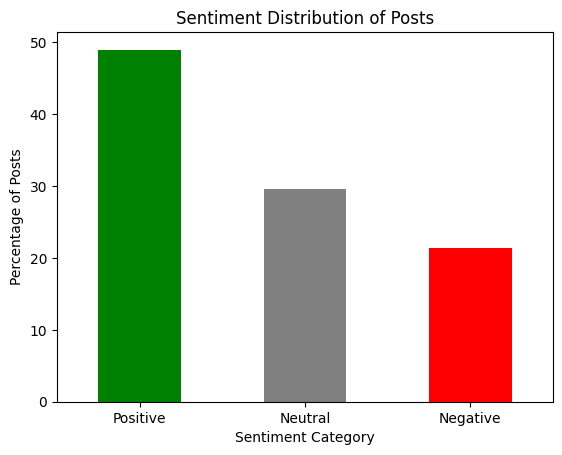

In [42]:
# Calculate the count of posts in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Calculate the percentage of posts in each category
sentiment_percentage = sentiment_counts / len(df) * 100

# Display the percentage of posts in each category
print(sentiment_percentage)

# Optional: Visualize the sentiment distribution using a bar chart
import matplotlib.pyplot as plt

sentiment_percentage.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()


# 4. Customer Complaints


In [44]:
#Step 1: Extract Posts Mentioning Complaints
print(df.columns)

# Define the function to identify complaints
def is_complaint(content):
    # Define a list of keywords related to complaints
    complaint_keywords = ['driver', 'cancellation', 'customer service', 'rude', 'late', 'refund', 'issue', 'problem']

    # Check if any of the keywords appear in the content (case insensitive)
    return any(keyword in content.lower() for keyword in complaint_keywords)

# Apply the function to the 'content' column
df['is_complaint'] = df['content'].apply(is_complaint)

# Filter posts that are identified as complaints
complaints_df = df[df['is_complaint'] == True]

# Display the first few rows of the complaints DataFrame
print(complaints_df[['content', 'is_complaint']].head())


Index(['tweet_id', 'content', 'datetime', 'likes', 'shares', 'views', 'source',
       'isBlue', 'followers', 'hashtags', 'location', 'user_mentions', 'media',
       'username', 'url', 'comments', 'total_engagement', 'sentiment_score',
       'sentiment_category'],
      dtype='object')
                                               content  is_complaint
38   hiring drivers or hooligans ? Your driver is d...          True
57   Hy #OLA this type of driver you're hiring he u...          True
213  Aur Karo Mahila Mahila Pehle faulty bikes reca...          True
221  "Cadbury should hire people for their 5-star c...          True
226  #OlaElectric #olaservice you think hiring boun...          True


In [45]:
# Step 2: Categorize Complaints into Distinct Groups

#Update to use the correct column name
df['is_complaint'] = df['content'].apply(is_complaint)
complaints_df = df[df['is_complaint'] == True]


<Axes: title={'center': 'Complaint Categories Distribution'}, xlabel='complaint_category'>

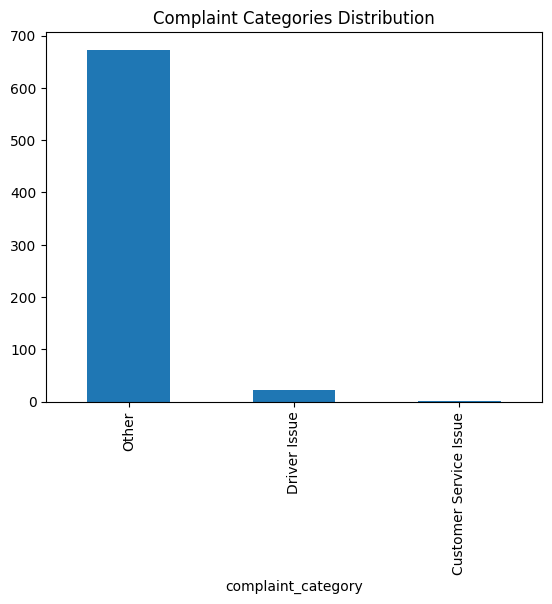

In [46]:
#Step 3: Visualize the Distribution of Complaint Categories

import matplotlib.pyplot as plt
# Define the categorization logic
def categorize_complaint(post_content):
    if 'driver' in post_content.lower():
        return 'Driver Issue'
    elif 'cancellation' in post_content.lower():
        return 'Booking Cancellation'
    elif 'customer service' in post_content.lower():
        return 'Customer Service Issue'
    else:
        return 'Other'

# Apply categorization to the DataFrame
df['complaint_category'] = df['content'].apply(categorize_complaint)

# Visualize the distribution of complaint categories
complaint_counts = df['complaint_category'].value_counts()
complaint_counts.plot(kind='bar', title='Complaint Categories Distribution')


# 5. Engagement Analysis

**5a. Correlation between Followers and Engagement Metrics:**

In [47]:
# Make sure followers and engagement metrics are numeric
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

# Calculate correlation matrix between followers and engagement metrics
correlation_matrix = df[['followers', 'likes', 'shares', 'comments']].corr()

# Display the correlation matrix
print(correlation_matrix)


           followers     likes    shares  comments
followers   1.000000  0.097637  0.030175       NaN
likes       0.097637  1.000000  0.530971       NaN
shares      0.030175  0.530971  1.000000       NaN
comments         NaN       NaN       NaN       NaN


**5b. Patterns in Engagement Based on the Source of Posts:**

In [48]:
# Assuming 'source' is the column representing the platform (e.g., Twitter, Instagram)
engagement_by_source = df.groupby('source')[['likes', 'shares', 'comments']].mean()

# Display the average engagement metrics by source
print(engagement_by_source)


              likes     shares  comments
source                                  
TWITTER  115.107759  13.781609       NaN


#Visualization Code:

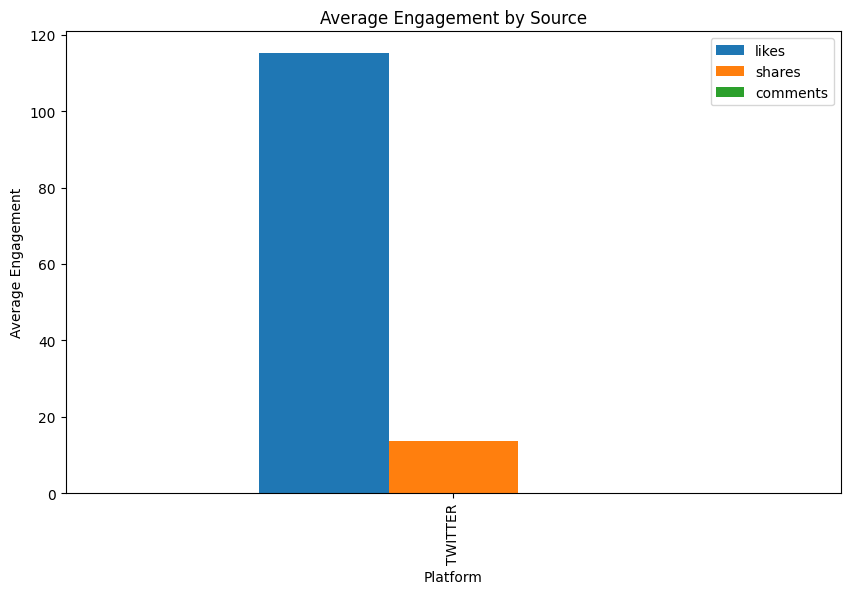

In [49]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Plot the average engagement by source
engagement_by_source.plot(kind='bar', figsize=(10, 6), title='Average Engagement by Source')
plt.xlabel('Platform')
plt.ylabel('Average Engagement')
plt.show()



# 6. Recommendations

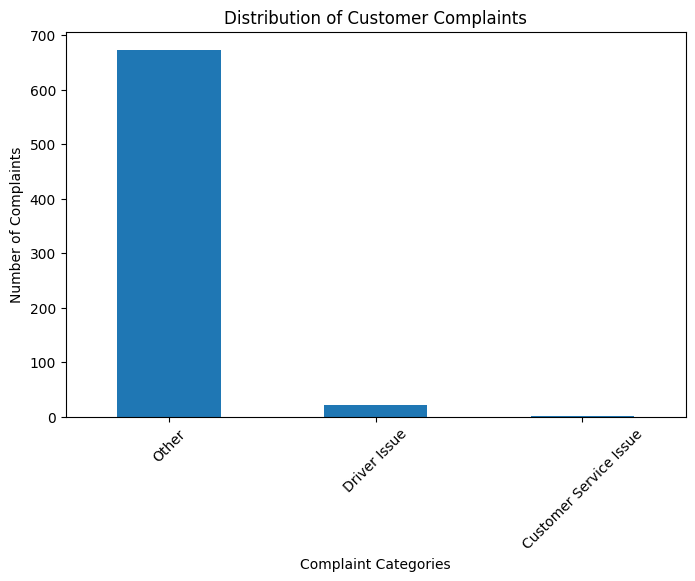

In [50]:
#1. Visualizing Customer Complaints for Service Improvement:

# Assuming 'complaint_category' column holds complaint categories (e.g., 'Driver Issue', 'Booking Problem', 'Customer Service')
complaint_counts = df['complaint_category'].value_counts()

# Plot the distribution of complaint categories
complaint_counts.plot(kind='bar', figsize=(8, 5), title='Distribution of Customer Complaints')
plt.xlabel('Complaint Categories')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


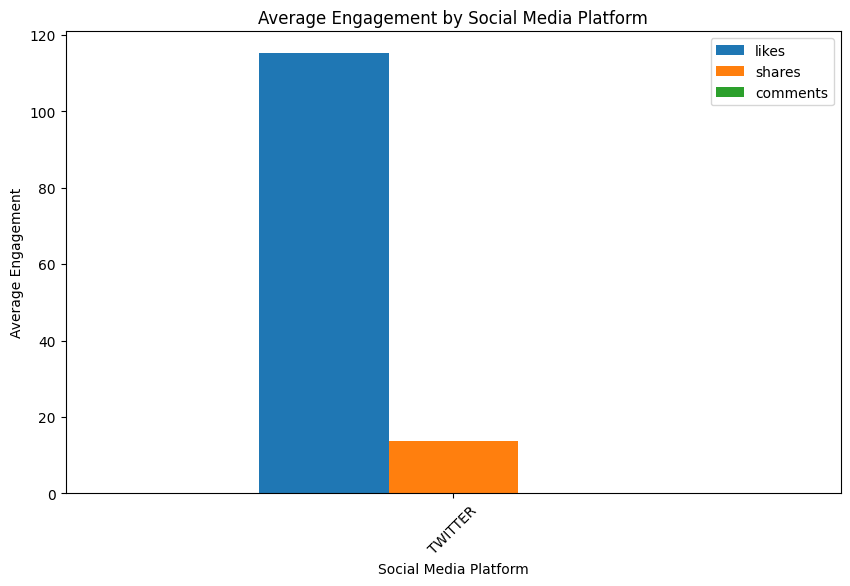

In [51]:
#2. Optimizing Social Media Strategy Based on Engagement Trends:

# Group posts by source and calculate average engagement metrics (likes, shares, comments)
platform_engagement = df.groupby('source')[['likes', 'shares', 'comments']].mean()

# Plot the engagement metrics across different platforms
platform_engagement.plot(kind='bar', figsize=(10, 6), title='Average Engagement by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#3. Leveraging Positive Sentiment for Brand Advocacy:
# Assuming 'sentiment_category' column holds the sentiment (Positive, Neutral, Negative)
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the distribution of sentiment categories
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sentiment Distribution of Posts')
plt.ylabel('')
plt.show()


# Summary of Visualizations:

**1.Complaint Distribution Bar Chart: Helps focus on areas that need customer service improvements.

2.Social Media Engagement Bar Chart: Shows where to focus the social media strategy based on engagement.

3.Sentiment Distribution Pie Chart: Highlights the amount of positive sentiment, which can be leveraged for brand advocacy.

These visualizations provide clear, data-driven insights that can support the actionable recommendations for Ola Cabs**